### Network Intrusion Detection System Using Machine Learning Algorithms

#### About the Dataset

The dataset used in this project is the [Network Intrusion Dectection](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection/data) dataset from Kaggle. The dataset is provided as 2 CSV files, `Train_data.csv` and `Test_data.csv`.

The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features). The class variable has two categories:
* Normal
* Anomalous

#### Data features

| **Feature name**            | **Description**                                                                        | **Type**   |
| --------------------------- | -------------------------------------------------------------------------------------- | ---------- |
| duration                    | Length (number of seconds) of the connection                                           | Continuous |
| protocol_type               | Protocol of connection                                                                 | Discrete   |
| service                     | Type of service accessed                                                               | Discrete   |
| flag                        | Status flag of the connection                                                          | Discrete   |
| src_bytes                   | Number of data bytes from the source to the destination                                | Continuous |
| dst_bytes                   | Number of data bytes from the destination to the source                                | Continuous |
| land                        | Value set to 1 if the connection is from/to the same host/port, otherwise 0            | Discrete   |
| wrong_fragment              | Number of wrong fragments                                                              | Continuous |
| urgent                      | Number of urgent packets                                                               | Continuous |
| hot                         | Number of "hot" indicators (highly related to intrusions) of the connection            | Continuous |
| num_failed_logins           | Number of failed login attempts                                                        | Continuous |
| logged_in                   | Value set to 1 if successfully logged in, otherwise 0                                  | Discrete   |
| num_compromised             | Number of "compromised" conditions (IoC)                                               | Continuous |
| root_shell                  | Value set to 1 if root shell is obtained, otherwise 0                                  | Discrete   |
| su_attempted                | Number of `su` command attempted                                                       | Continuous |
| num_root                    | Number of root accesses                                                                | Continuous |
| num_file_creations          | Number of file creation operations                                                     | Continuous |
| num_shells                  | Number of shell prompts                                                                | Continuous |
| num_access_files            | Number of operations on access control files                                           | Continuous |
| num_outbound_cmds           | Number of outbound commands                                                            | Continuous |
| is_host_login               | Value set to 1 if login belongs to the "host" list, otherwise 0                        | Discrete   |
| is_guest_login              | Value set to 1 if login belongs to the "guest" list, otherwise 0                       | Discrete   |
| count                       | Number of connections to same host as current connection in 2 seconds                  | Continuous |
| srv_count                   | Number of connections to same service as current connection in 2 seconds               | Continuous |
| serror_rate                 | Percentage of connections with SYN errors.                                             | Continuous |
| srv_serror_rate             | Percentage of connections to the same service with SYN errors.                         | Continuous |
| rerror_rate                 | Percentage of connections with REJ errors.                                             | Continuous |
| srv_rerror_rate             | Percentage of connections to the same service with REJ errors.                         | Continuous |
| same_srv_rate               | Percentage of connections to the same service.                                         | Continuous |
| diff_srv_rate               | Percentage of connections to different services.                                       | Continuous |
| srv_diff_host_rate          | Percentage of connections to different hosts for the same service.                     | Continuous |
| dst_host_count              | Number of connections to the same destination host.                                    | Continuous |
| dst_host_srv_count          | Number of connections to the same service on the destination host.                     | Continuous |
| dst_host_same_srv_rate      | Percentage of connections to the same service on the destination host.                 | Continuous |
| dst_host_diff_srv_rate      | Percentage of connections to different services on the destination host.               | Continuous |
| dst_host_same_src_port_rate | Percentage of connections from the same source port to the destination host.           | Continuous |
| dst_host_srv_diff_host_rate | Percentage of connections to different hosts for the same service.                     | Continuous |
| dst_host_serror_rate        | Percentage of connections to the destination host with SYN errors.                     | Continuous |
| dst_host_srv_serror_rate    | Percentage of connections to the same service on the destination host with SYN errors. | Continuous |
| dst_host_rerror_rate        | Percentage of connections to the destination host with REJ errors.                     | Continuous |
| dst_host_srv_rerror_rate    | Percentage of connections to the same service on the destination host with REJ errors. | Continuous |
| class                       | Indicate if connection is normal or anomalous                                          | Discrete   |


#### Load dataset

In [41]:
# Add libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [42]:
# Read train data file
path_train = "Train_data.csv"
df = pd.read_csv(path_train)

df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


#### Exploring the dataset

In [43]:
# See the dimensions of the dataframe
df.shape

(25192, 42)

In [44]:
# Check if there is any missing value
df.isnull().sum()

# None of the column have missing value

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Data Visualization

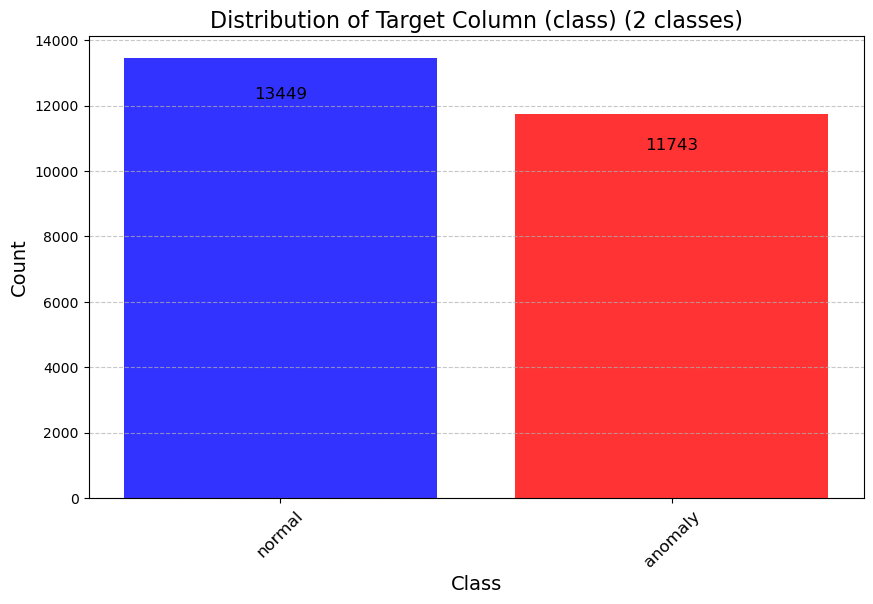

In [45]:
# Extract the target column (class)
target_col = df["class"]
# Get the value counts
value_counts = target_col.value_counts()
# Get the number of unique classes
unique_count = target_col.nunique()

# Plot the distribution of the target column
plt.figure(figsize=(10, 6))
bars = plt.bar(value_counts.index, value_counts.values, color=["blue", "red"], alpha=0.8)
plt.title(f"Distribution of Target Column (class) ({unique_count} classes)", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with the count
for bar, count in zip(bars, value_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - bar.get_height() * 0.1, str(count), ha="center", va="bottom", fontsize=12, color="black")

plt.show()

In [46]:
# Get qualitative (categorial) features
# Excluding the class column which is the target label we are trying to predict
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns) - set(num_cols))
cate_cols.remove("class")
cate_cols

['protocol_type', 'flag', 'service']

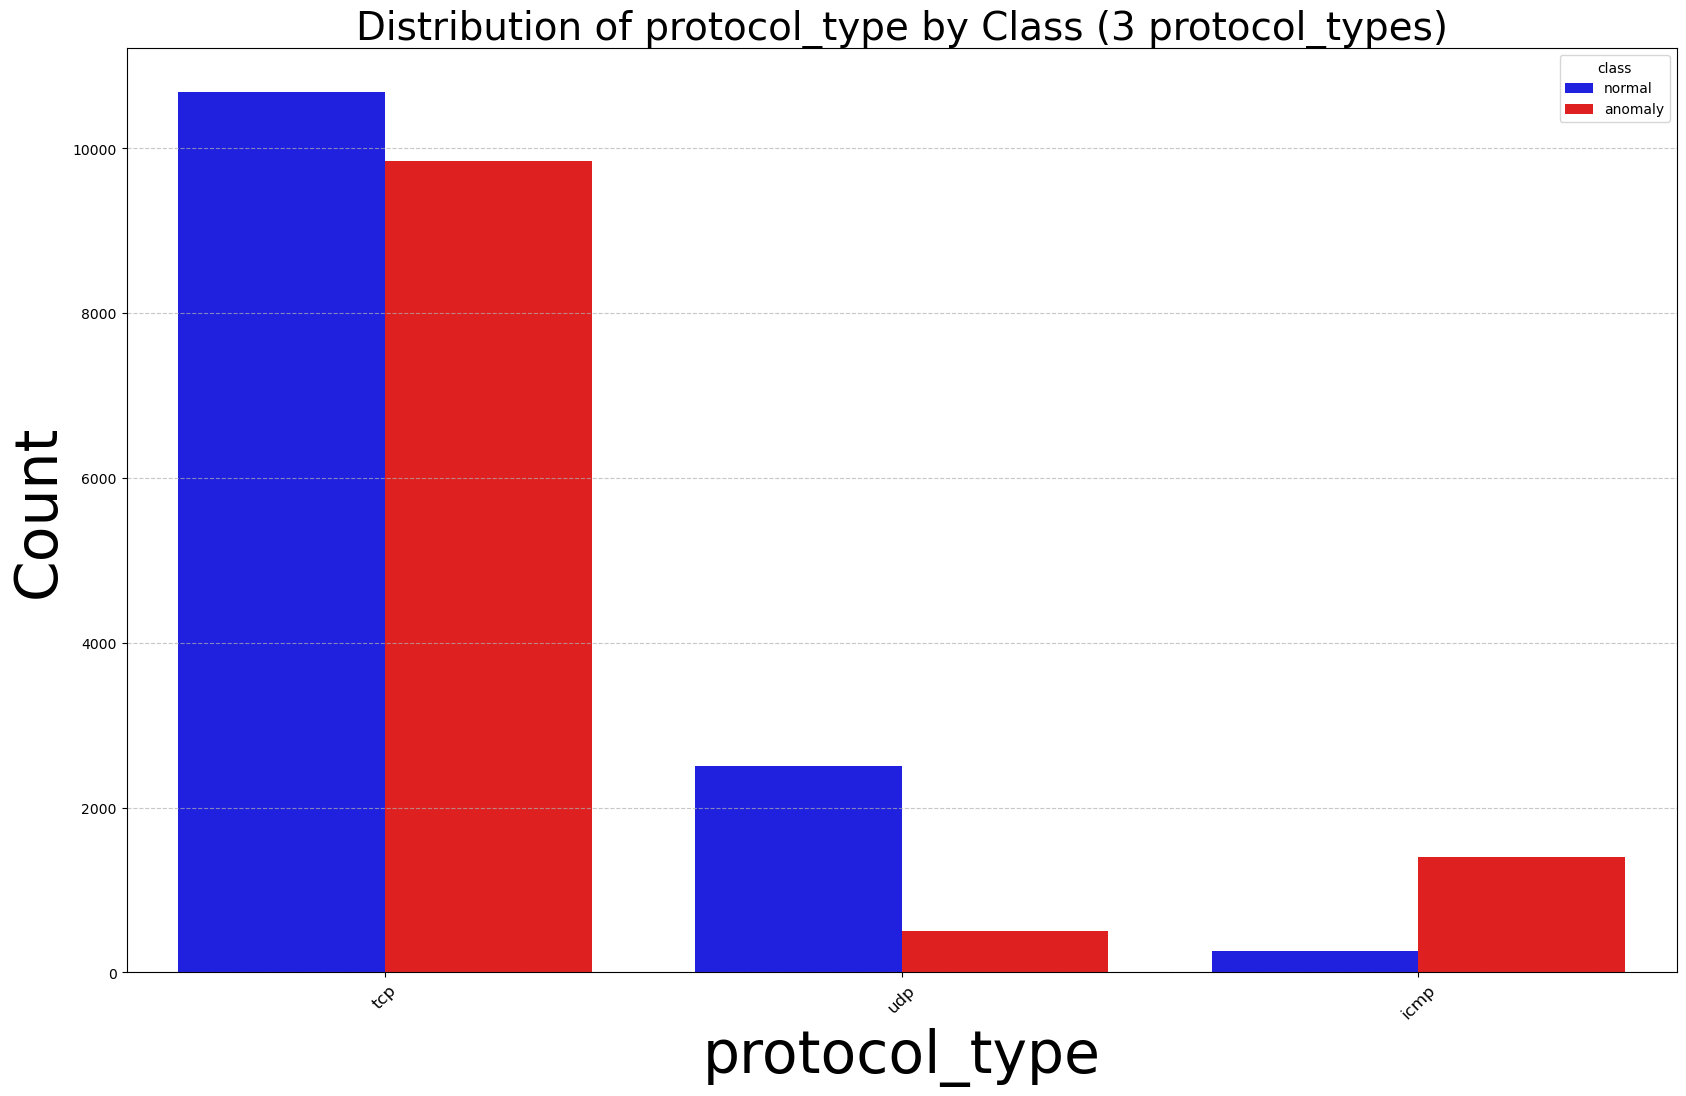

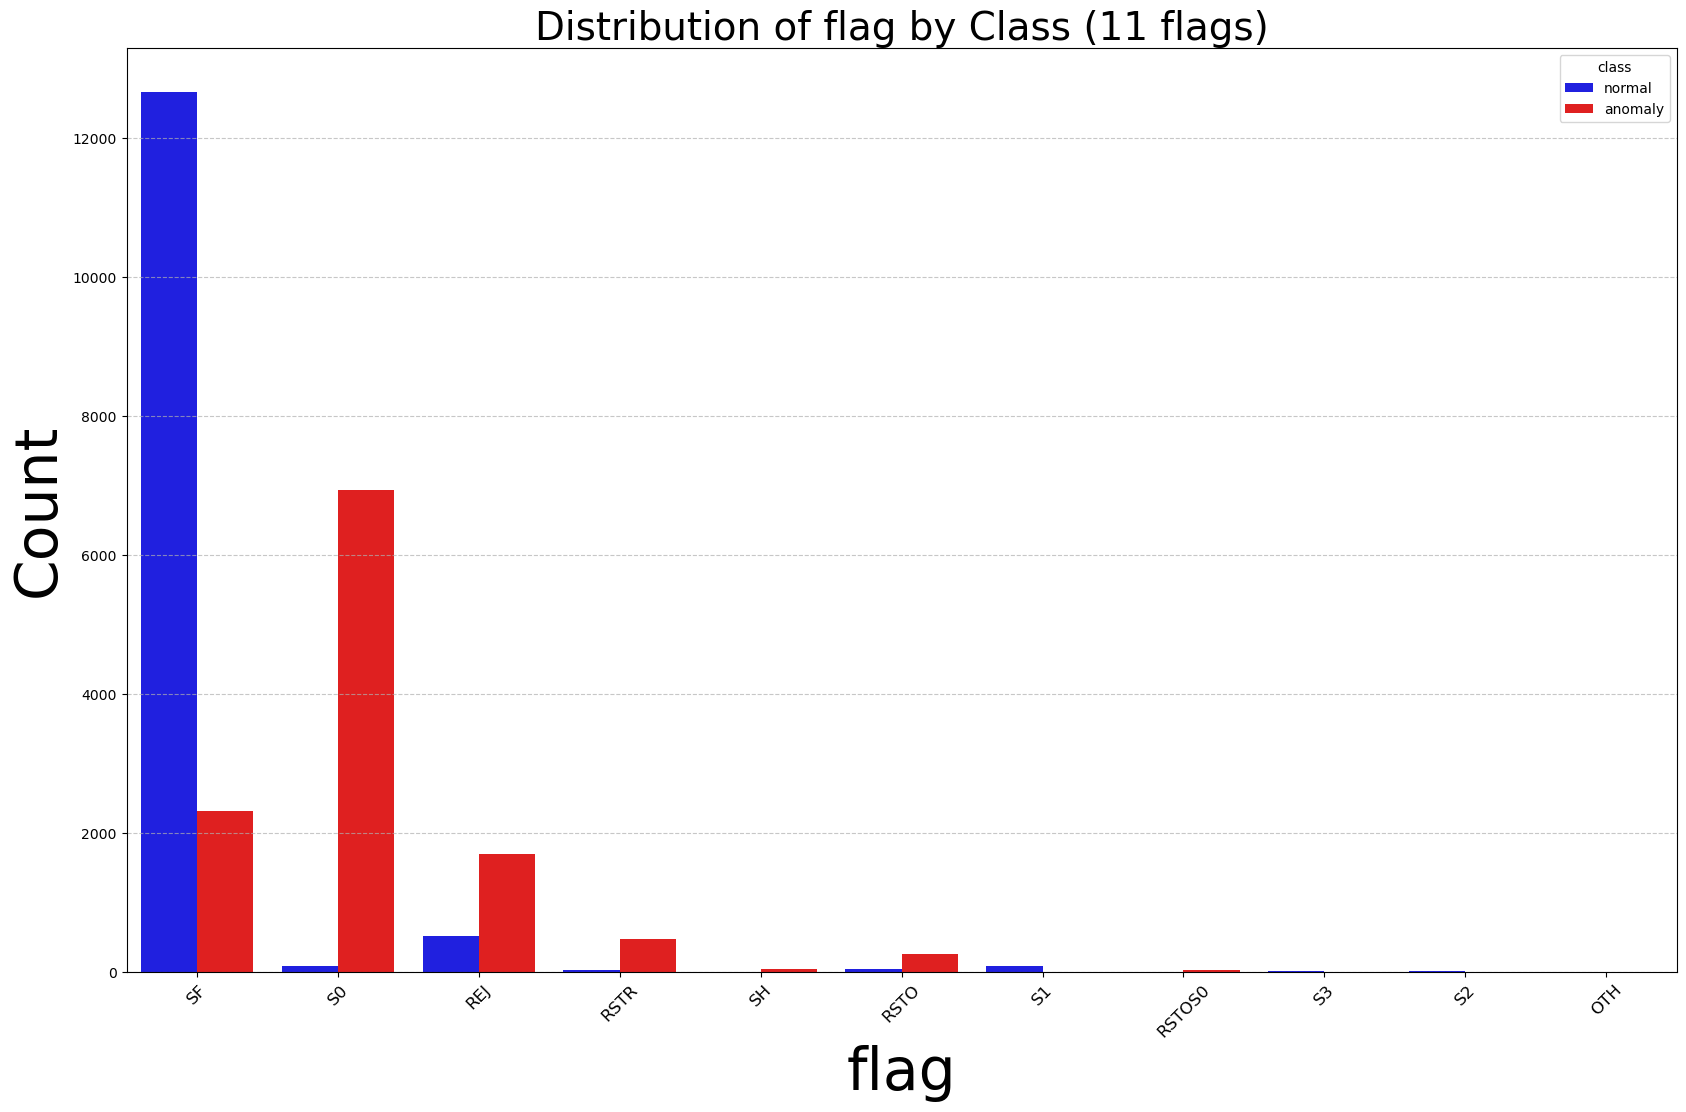

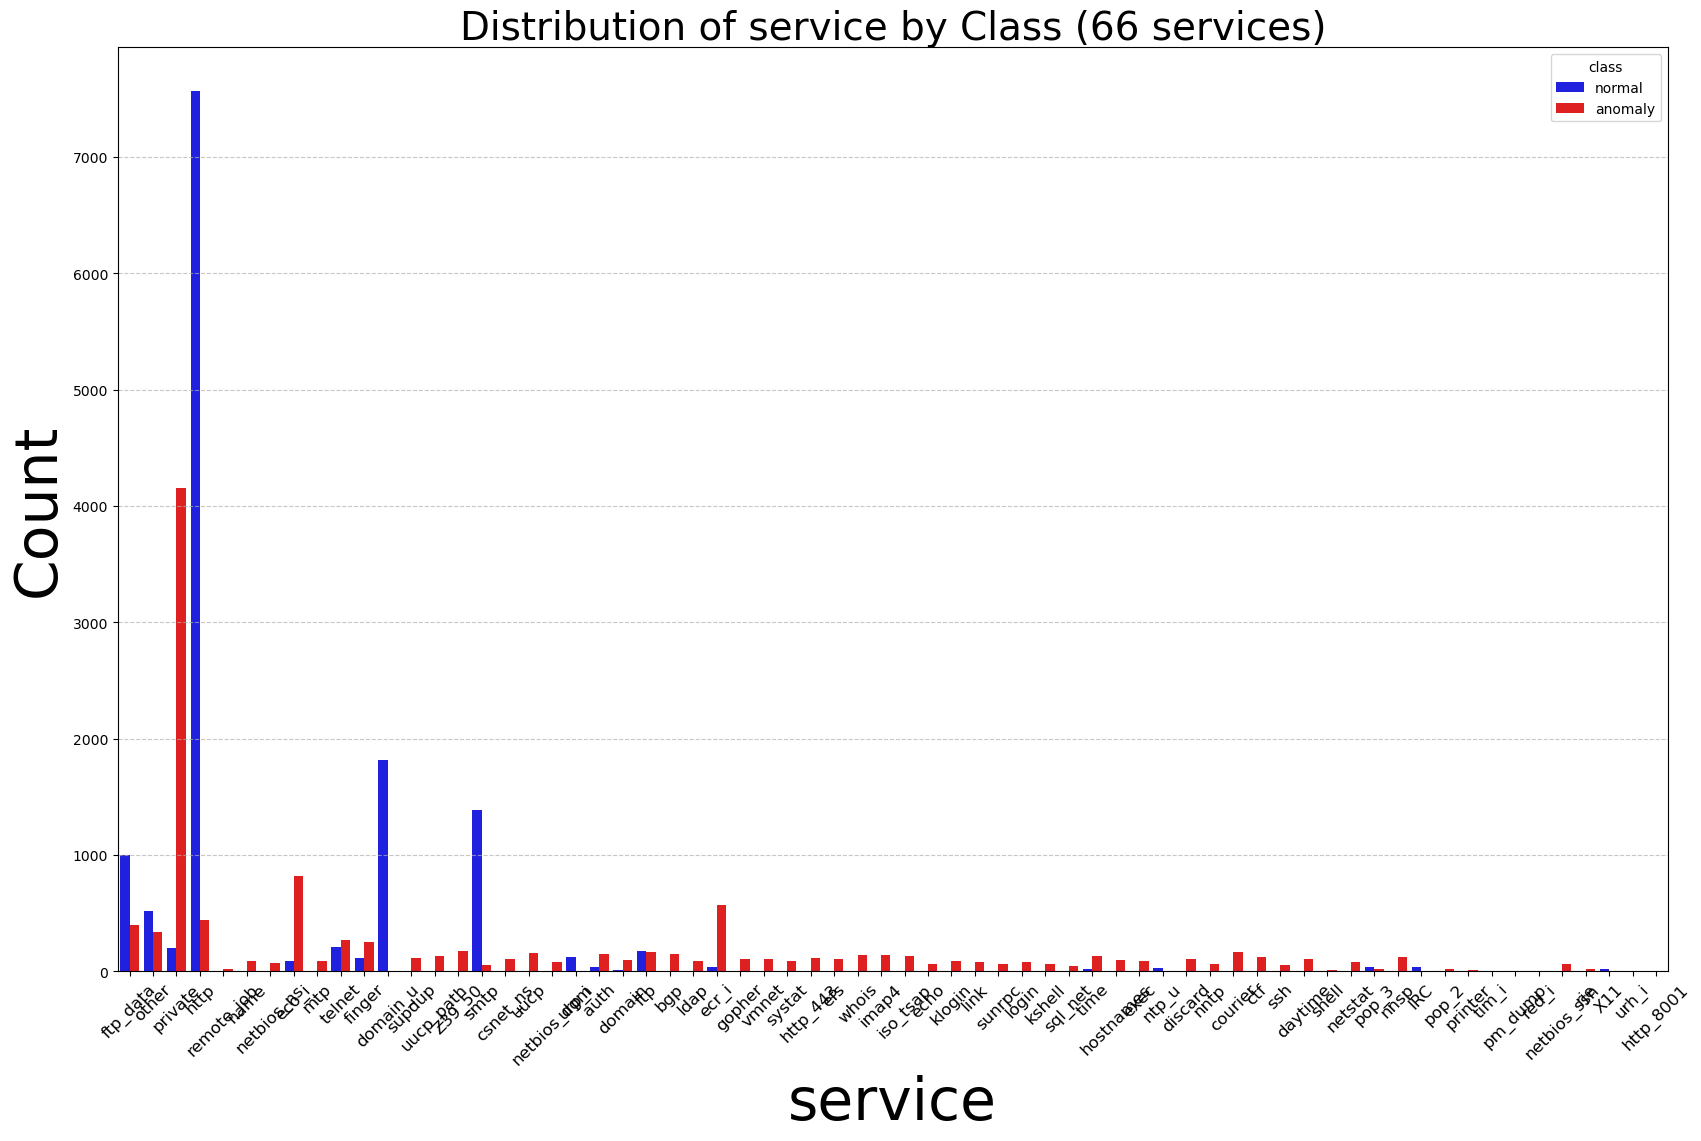

In [47]:
# Show distribution of the qualitative features by class
for col in cate_cols:
    plt.figure(figsize=(20, 12))
    unique_count = df[col].nunique()
    sns.countplot(data=df, x=col, hue="class", palette=["blue", "red"])
    plt.title(f"Distribution of {col} by Class ({unique_count} {col}s)", fontsize=28)
    plt.xlabel(col, fontsize=42)
    plt.ylabel("Count", fontsize=42)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

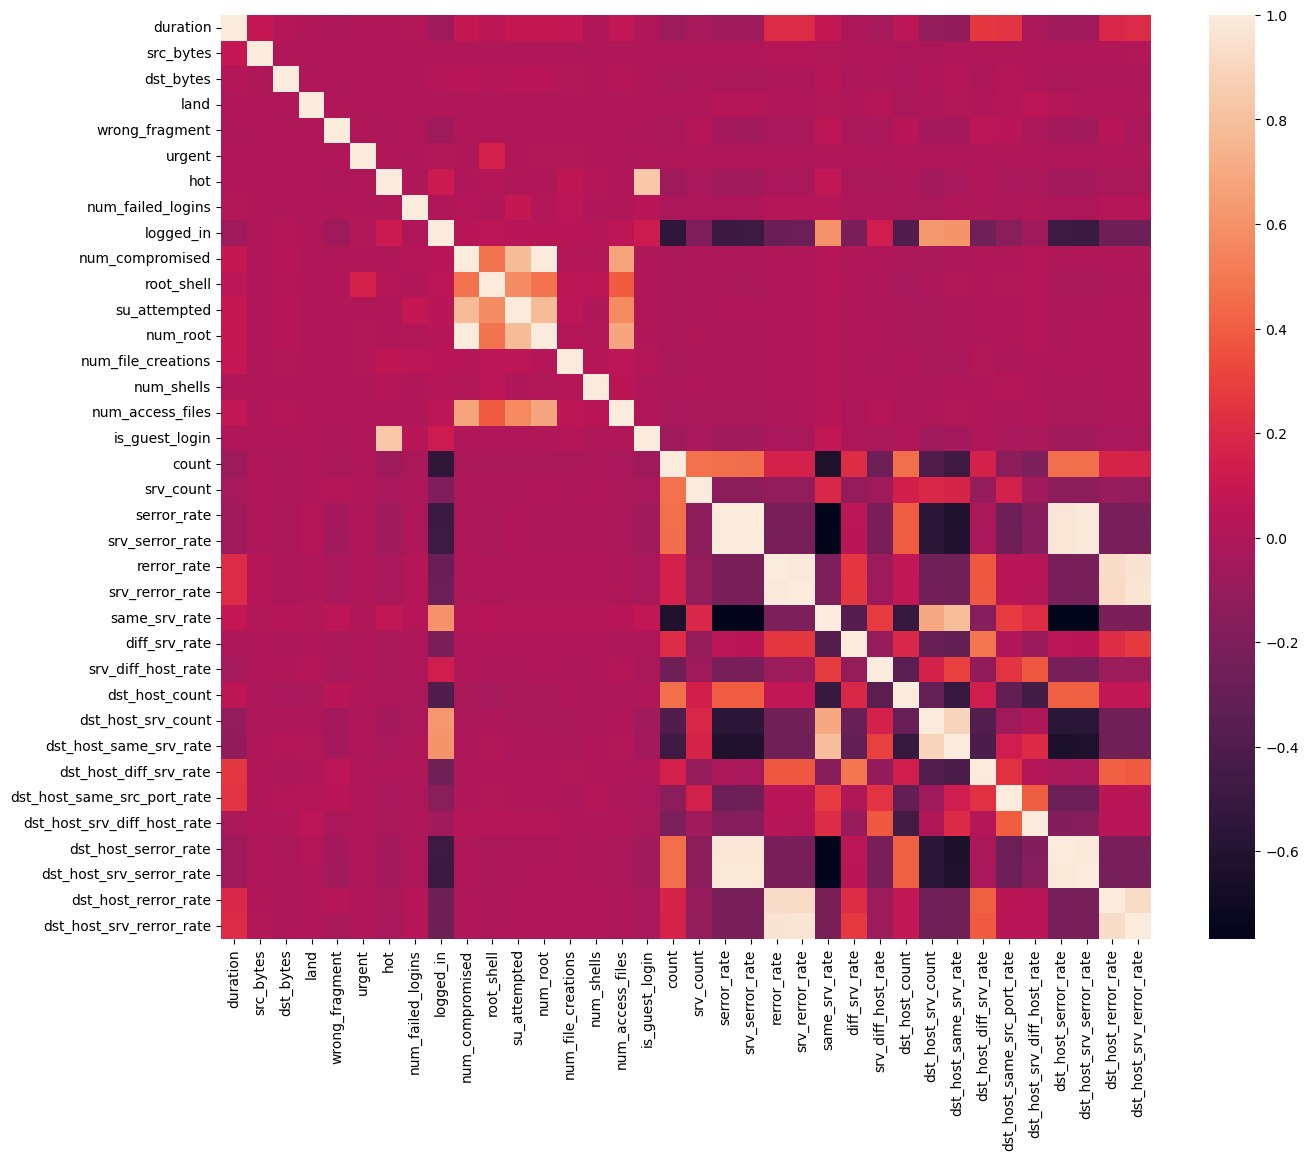

In [48]:
# Drop columns with missing values
df = df.dropna(axis="columns")
# Filter out numerical columns with only one unique value
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]
# Calculate the correlation matrix
corr = ndf.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr)
plt.show()

#### Data Preprocessing

In [49]:
# Drop highly correlated columns to avoid noise in the model

# Drop this column due to high correlation with num_compromised
df.drop('num_root', axis = 1, inplace = True)

# Drop this column due to high correlation with serror_rate
df.drop('srv_serror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with rerror_rate
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with serror_rate
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with serror_rate
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with rerror_rate
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with rerror_rate
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# Drop this column due to high correlation with same_srv_rate
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [50]:
# Qualitative features mapping

# protocol_type feature mapping
pmap = {"icmp": 0, "tcp": 1, "udp": 2}
df["protocol_type"] = df["protocol_type"].map(pmap)

# flag feature mapping
fmap = {"SF": 0, "S0": 1, "REJ": 2, "RSTR": 3, "RSTO": 4, "SH": 5, "S1": 6, "S2": 7, "RSTOS0": 8, "S3": 9, "OTH": 10}
df["flag"] = df["flag"].map(fmap)

In [51]:
# This column seems to be irrelevant to the prediction
# Drop the column since it may not contribute significantly to the prediction
df.drop("service", axis=1, inplace=True)

#### Modeling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [53]:
# Split the data into features and target
Y = df[["class"]]
X = df.drop(["class"], axis=1)

# Normalize the features to improve the model performance
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(20153, 32) (5039, 32)
(20153, 1) (5039, 1)


##### Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a GNB classifier
clfg = GaussianNB()
# Get training time
start_time = time.time()
# Train the model
clfg.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  0.025952577590942383


In [55]:
# Get validation time
start_time = time.time()
Y_train_pred = clfg.predict(X_train)
end_time = time.time()
print("Validation time: ", end_time - start_time)

Validation time:  0.013117551803588867


In [56]:
# Get training and validation scores
print("Train score is:", clfg.score(X_train, Y_train))
print("Validation score is:", clfg.score(X_test, Y_test))

Train score is: 0.918076713144445
Validation score is: 0.9285572534232983


=== Training Set Evaluation ===
Accuracy: 0.918076713144445
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.91      0.91      0.91      9378
      normal       0.92      0.92      0.92     10775

    accuracy                           0.92     20153
   macro avg       0.92      0.92      0.92     20153
weighted avg       0.92      0.92      0.92     20153

Confusion Matrix:
 [[8558  820]
 [ 831 9944]]

=== Test Set Evaluation ===
Accuracy: 0.9285572534232983
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.92      0.92      0.92      2365
      normal       0.93      0.93      0.93      2674

    accuracy                           0.93      5039
   macro avg       0.93      0.93      0.93      5039
weighted avg       0.93      0.93      0.93      5039

Confusion Matrix:
 [[2184  181]
 [ 179 2495]]


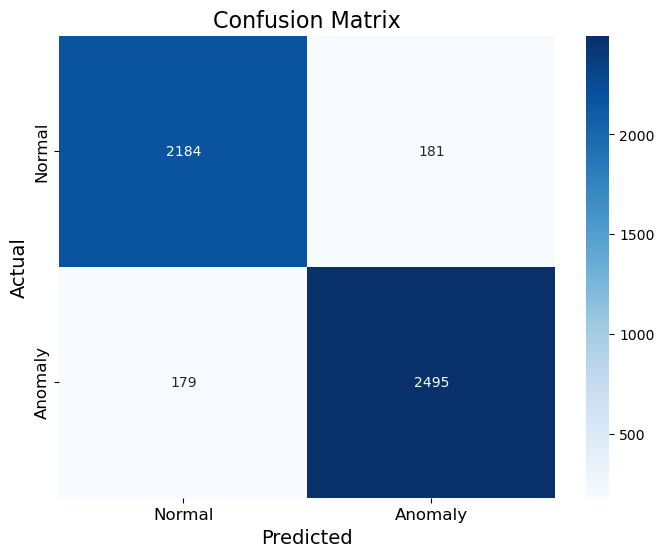

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions on the training set
Y_train_pred = clfg.predict(X_train)
# Get accuracy score on the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
# Get classification report on the training set
train_classification_report = classification_report(Y_train, Y_train_pred)
# Get confusion matrix on the training set
train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)

# Get predictions on the test set
Y_test_pred = clfg.predict(X_test)
# Get accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
# Get classification report on the test set
test_classification_report = classification_report(Y_test, Y_test_pred)
# Get confusion matrix on the test set
test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)

# Display results on training set
print("=== Training Set Evaluation ===")
print(f"Accuracy: {train_accuracy}")
print("Classification Report:\n", train_classification_report)
print("Confusion Matrix:\n", train_confusion_matrix)

# Display results on test set
print("\n=== Test Set Evaluation ===")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

# Plot out the confusion matrix
labels = ["Normal", "Anomaly"]
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
# Measure training time
start_time = time.time()
clfd.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  0.04249715805053711


In [59]:
# Measure validation time
start_time = time.time()
Y_train_pred = clfd.predict(X_train)
end_time = time.time()
print("Validation time: ", end_time - start_time)

Validation time:  0.0022058486938476562


In [60]:
# Get training and validation scores
print("Train score is:", clfg.score(X_train, Y_train))
print("Validation score is:", clfg.score(X_test, Y_test))

Train score is: 0.918076713144445
Validation score is: 0.9285572534232983


=== Training Set Evaluation ===
Accuracy: 0.9630824194908947
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.98      0.94      0.96      9378
      normal       0.95      0.98      0.97     10775

    accuracy                           0.96     20153
   macro avg       0.96      0.96      0.96     20153
weighted avg       0.96      0.96      0.96     20153

Confusion Matrix:
 [[ 8848   530]
 [  214 10561]]

=== Test Set Evaluation ===
Accuracy: 0.9622941059734075
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.97      0.95      0.96      2365
      normal       0.96      0.97      0.96      2674

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039

Confusion Matrix:
 [[2243  122]
 [  68 2606]]


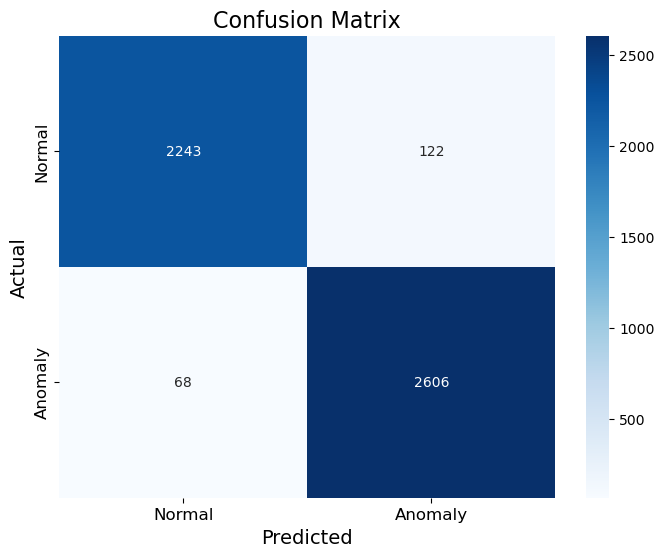

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the training set
Y_train_pred = clfd.predict(X_train)
# Training set evaluation
train_accuracy = accuracy_score(Y_train, Y_train_pred)
# Classification report on the training set
train_classification_report = classification_report(Y_train, Y_train_pred)
# Confusion matrix on the training set
train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)

# Predictions on the test set
Y_test_pred = clfd.predict(X_test)
# Test set evaluation
test_accuracy = accuracy_score(Y_test, Y_test_pred)
# Classification report on the test set
test_classification_report = classification_report(Y_test, Y_test_pred)
# Confusion matrix on the test set
test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)

# Display results on training set
print("=== Training Set Evaluation ===")
print(f"Accuracy: {train_accuracy}")
print("Classification Report:\n", train_classification_report)
print("Confusion Matrix:\n", train_confusion_matrix)

# Display results on test set
print("\n=== Test Set Evaluation ===")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

# Plot out the confusion matrix
labels = ["Normal", "Anomaly"]
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clfr = RandomForestClassifier(n_estimators = 30)
# Measure training time
start_time = time.time()
clfr.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.2752201557159424


In [63]:
# Measure validation time
start_time = time.time()
Y_train_pred = clfr.predict(X_train)
end_time = time.time()
print("Validation time: ", end_time-start_time)

Validation time:  0.023548126220703125


In [64]:
# Get training and validation scores
print("Train score is:", clfr.score(X_train, Y_train))
print("Validation score is:", clfr.score(X_test, Y_test))

Train score is: 1.0
Validation score is: 0.9956340543758683


=== Training Set Evaluation ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      9378
      normal       1.00      1.00      1.00     10775

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153

Confusion Matrix:
 [[ 9378     0]
 [    0 10775]]

=== Test Set Evaluation ===
Accuracy: 0.9956340543758683
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      2365
      normal       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

Confusion Matrix:
 [[2352   13]
 [   9 2665]]


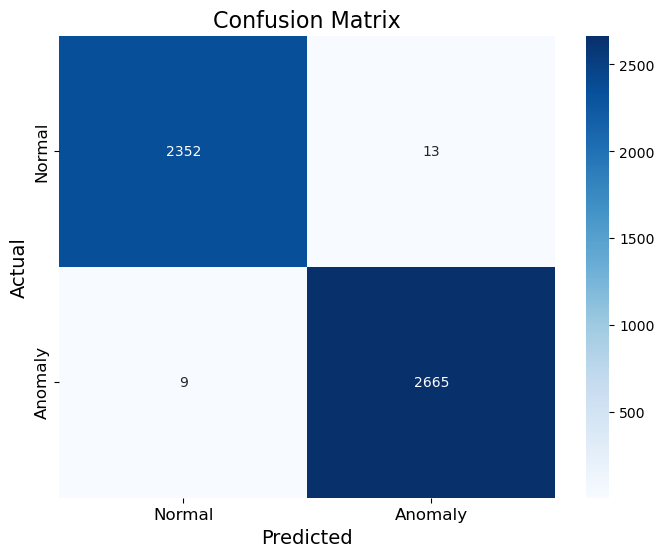

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the training set
Y_train_pred_1 = clfr.predict(X_train)
# Training set evaluation
train_accuracy = accuracy_score(Y_train, Y_train_pred)
# Classification report on the training set
train_classification_report = classification_report(Y_train, Y_train_pred)
# Confusion matrix on the training set
train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)

# Predictions on the test set
Y_test_pred = clfr.predict(X_test)
# Test set evaluation
test_accuracy = accuracy_score(Y_test, Y_test_pred)
# Classification report on the test set
test_classification_report = classification_report(Y_test, Y_test_pred)
# Confusion matrix on the test set
test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)

# Display results on training set
print("=== Training Set Evaluation ===")
print(f"Accuracy: {train_accuracy}")
print("Classification Report:\n", train_classification_report)
print("Confusion Matrix:\n", train_confusion_matrix)

# Display results on test set
print("\n=== Test Set Evaluation ===")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

# Plot out the confusion matrix
labels = ['Normal', 'Anomaly']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

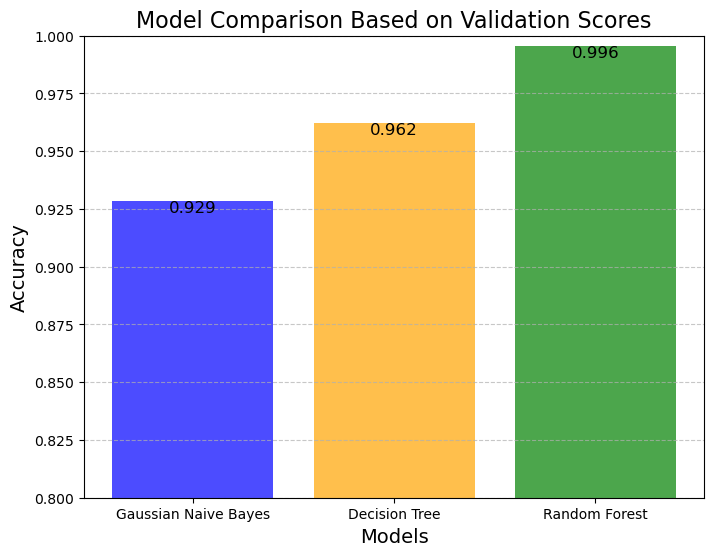

In [67]:
# Validation scores of the models
validation_scores = {
    "Gaussian Naive Bayes": clfg.score(X_test, Y_test),
    "Decision Tree": clfd.score(X_test, Y_test),
    "Random Forest": clfr.score(X_test, Y_test),
}

# Extract model names and their corresponding scores
model_names = list(validation_scores.keys())
scores = list(validation_scores.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, scores, color=["blue", "orange", "green"], alpha=0.7)

# Annotate bars with the exact accuracy values
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f"{score:.3f}", ha="center", va="top", fontsize=12)

# Add labels and title
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("Model Comparison Based on Validation Scores", fontsize=16)
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()